# Análise de Dados de Pokémons com PokeAPI


## 1. Instalação das Bibliotecas Necessárias

Antes de iniciar a análise, é necessário instalar as bibliotecas que serão utilizadas para a coleta, manipulação e visualização dos dados.

### Tabela de Bibliotecas

| Biblioteca          | Função                                          |
|---------------------|-------------------------------------------------|
| `requests`          | Para fazer chamadas HTTP à API                |
| `pandas`            | Para manipulação de dados                     |
| `matplotlib`        | Para visualização dos dados                   |
| `python-dotenv`     | Para carregar variáveis de ambiente a partir de um arquivo `.env` |
| `google.generativeai` | Para utilizar o modelo de IA generativa do Gemini |


**INSTALANDO BIBLIOTECAS**

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import google.generativeai as gemini

## Configurando API do Gemini

In [2]:
load_dotenv()

gemini_api_key = os.getenv("GEMINI_API_KEY")

gemini.configure(api_key=gemini_api_key)
model = gemini.GenerativeModel('gemini-1.5-pro')


**CHAMANDO A API**


| Etapa       | Descrição                                         |
|-------------|---------------------------------------------------|
| **URL**     | Define o endpoint da API                          |
| **Requisição** | Fazemos a chamada HTTP usando `requests.get`       |
| **Resposta** | Convertendo a resposta JSON em um dicionário Python |


In [3]:
url = "https://pokeapi.co/api/v2/pokemon/?limit=50"

response = requests.get(url)
data = response.json()

**EXTRAINDO DADOS**

### Tabela de Dados Extraídos

| Nome     | Altura (m) | Peso (kg) | Tipo            | Base de Experiência |
|----------|------------|-----------|-----------------|---------------------|
| Bulbasaur| 2.13       | 31.29       | grass, poison   | 64                  |
| Ivysaur  | 3.05       | 58.95      | grass, poison   | 142                 |
| ...      | ...        | ...       | ...             | ...                 |
| (total de 50 Pokémons) |


In [4]:
pokemons_info = []
for pokemon in data['results']:
    pokemon_data = requests.get(pokemon['url']).json()
    base_experience = pokemon_data['base_experience']

    height_in_meters = float('{:.2f}'.format(pokemon_data['height'] * 0.3048))
    weight_in_kg = float('{:.2f}'.format(pokemon_data['weight'] * 0.4535))
    
    pokemons_info.append({
        'name': pokemon_data['name'],
        'height (m)': height_in_meters,
        'weight (kg)': weight_in_kg,
        'type': ', '.join([type['type']['name'] for type in pokemon_data['types']]),
        'base_experience': base_experience
    })

**CRIANDO UM DATAFRAME COM OS DADOS EXTRAÍDOS**

In [5]:
df = pd.DataFrame(pokemons_info)
df

,name,height (m),weight (kg),type,base_experience
0,bulbasaur,2.13,31.29,"grass, poison",64
1,ivysaur,3.05,58.95,"grass, poison",142
2,venusaur,6.10,453.50,"grass, poison",263
3,charmander,1.83,38.55,fire,62
4,charmeleon,3.35,86.17,fire,142
5,charizard,5.18,410.42,"fire, flying",267
6,squirtle,1.52,40.81,water,63
7,wartortle,3.05,102.04,water,142
8,blastoise,4.88,387.74,water,265
9,caterpie,0.91,13.15,bug,39


**RELAÇÃO ENTRE ALTURA E PESO DOS POKEMONS**

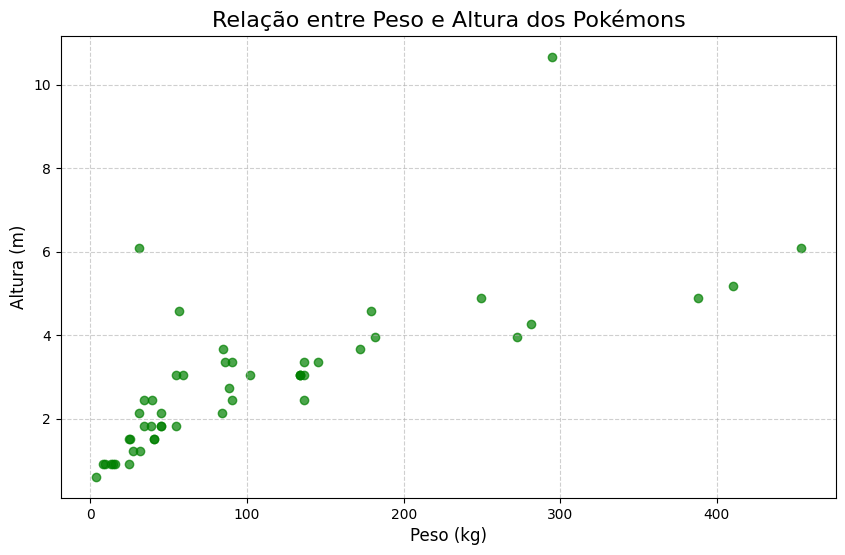

In [6]:
alturas = df['height (m)']
pesos = df['weight (kg)']
plt.figure(figsize=(10, 6))
plt.scatter(pesos, alturas, alpha=0.7, c='green')
plt.title('Relação entre Peso e Altura dos Pokémons', fontsize=16)
plt.xlabel('Peso (kg)', fontsize=12)
plt.ylabel('Altura (m)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**SEPARANDO POKEMONS POR TIPO**

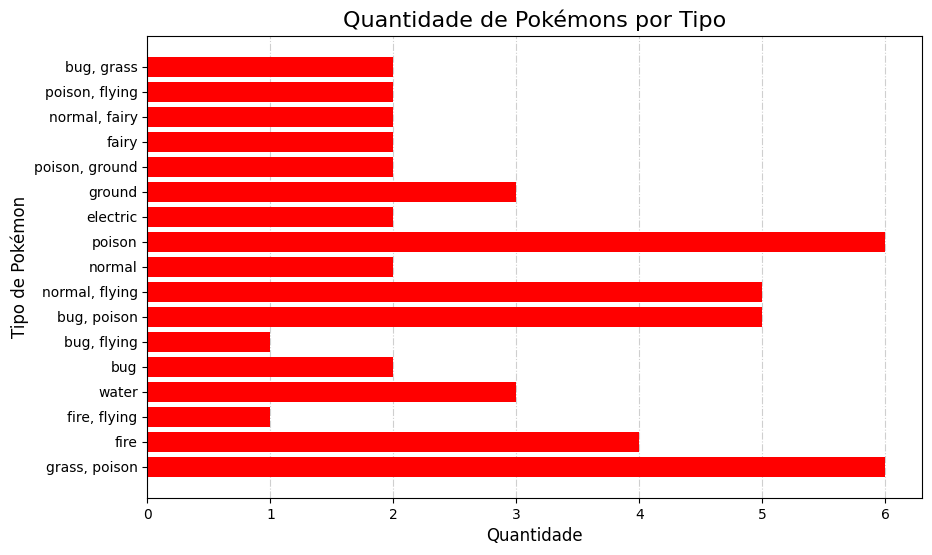

In [7]:
quantidade_por_tipo = {}
for type in df['type']:
    try:
        quantidade_por_tipo[type] += 1
    except:
        quantidade_por_tipo[type] = 1

tipo = list(quantidade_por_tipo.keys())
quantidade = list(quantidade_por_tipo.values())

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(tipo, quantidade, color='red')
plt.title('Quantidade de Pokémons por Tipo', fontsize=16)
ax.set_xlabel('Quantidade', fontsize=12)
ax.set_ylabel('Tipo de Pokémon', fontsize=12)
ax.xaxis.grid(linestyle='-.', alpha=0.6)
ax.set_axisbelow(True)
plt.show()

### 1. Análise de Base de Experiência dos Pokémons
- Objetivo: Analisar como a base de experiência dos Pokémons varia conforme o tipo.

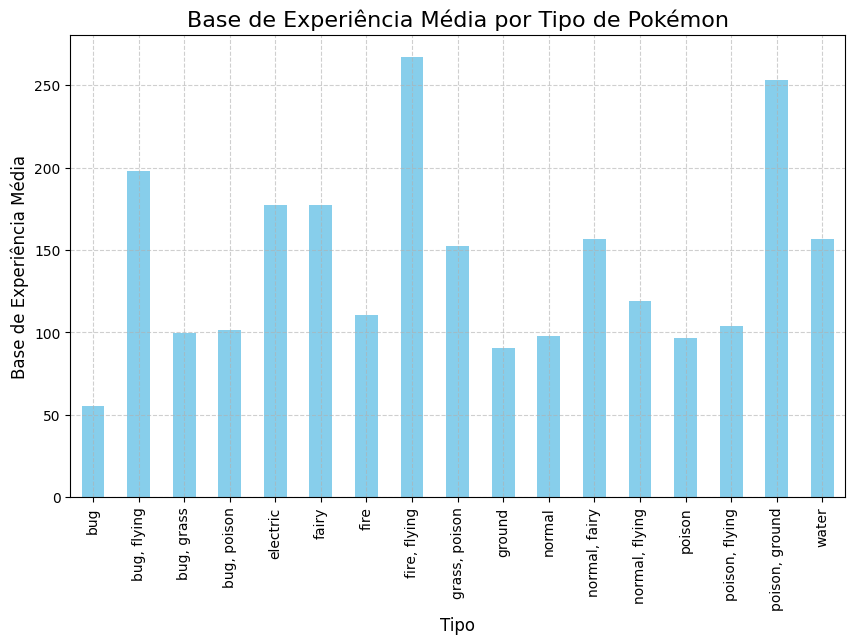

In [8]:
base_experience_mean = df.groupby('type')['base_experience'].mean()

plt.figure(figsize=(10, 6))
base_experience_mean.plot(kind='bar', color='skyblue')
plt.title('Base de Experiência Média por Tipo de Pokémon', fontsize=16)
plt.xlabel('Tipo', fontsize=12)
plt.ylabel('Base de Experiência Média', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Distribuição de Altura e Peso dos Pokémons
- Distribuições de altura e peso dos Pokémons são apresentadas em histogramas.


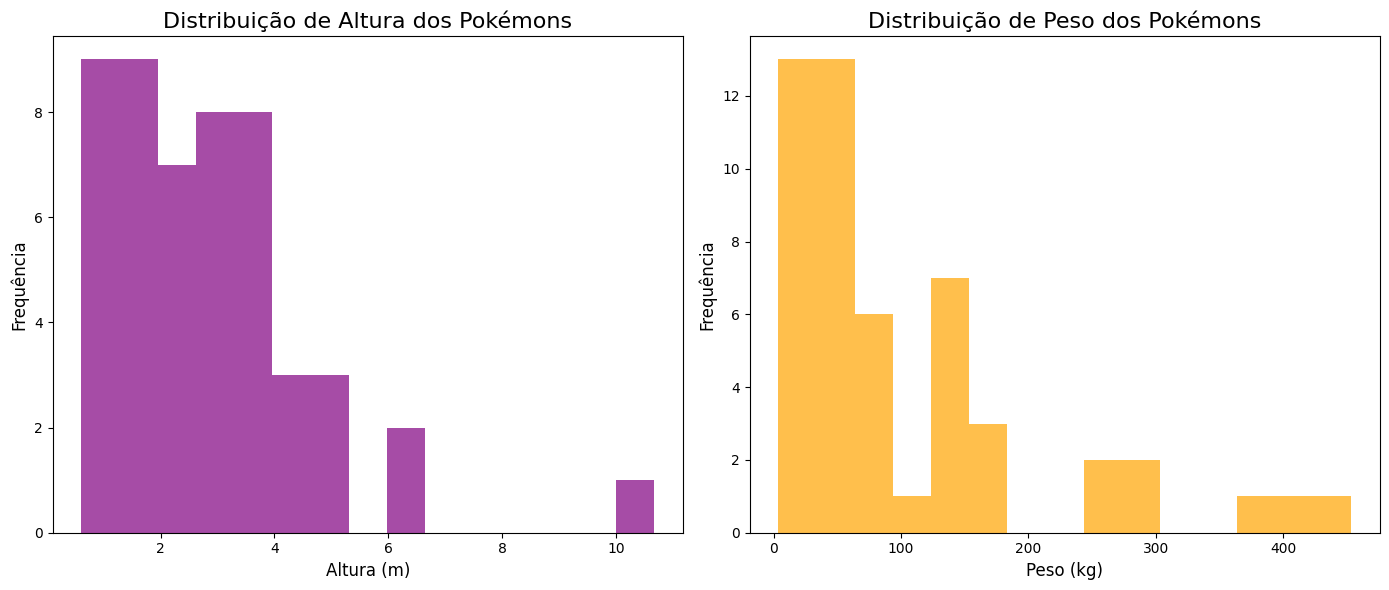

In [9]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['height (m)'], bins=15, color='purple', alpha=0.7)
plt.title('Distribuição de Altura dos Pokémons', fontsize=16)
plt.xlabel('Altura (m)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.subplot(1, 2, 2)
plt.hist(df['weight (kg)'], bins=15, color='orange', alpha=0.7)
plt.title('Distribuição de Peso dos Pokémons', fontsize=16)
plt.xlabel('Peso (kg)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.tight_layout()
plt.show()


### Pokémons Raros
- Identifica os Pokémons raros com base na base de experiência e visualização em um gráfico de barras horizontais.


In [10]:
rare_pokemons = df[df['base_experience'] > 200]  # Considerando como raros aqueles com base_experience > 200
rare_pokemons[['name', 'type', 'base_experience']]

,name,type,base_experience
2,venusaur,"grass, poison",263
5,charizard,"fire, flying",267
8,blastoise,water,265
17,pidgeot,"normal, flying",216
25,raichu,electric,243
30,nidoqueen,"poison, ground",253
33,nidoking,"poison, ground",253
35,clefable,fairy,242
39,wigglytuff,"normal, fairy",218
44,vileplume,"grass, poison",245


### Gráfico de Barras Horizontais dos Pokémons Raros

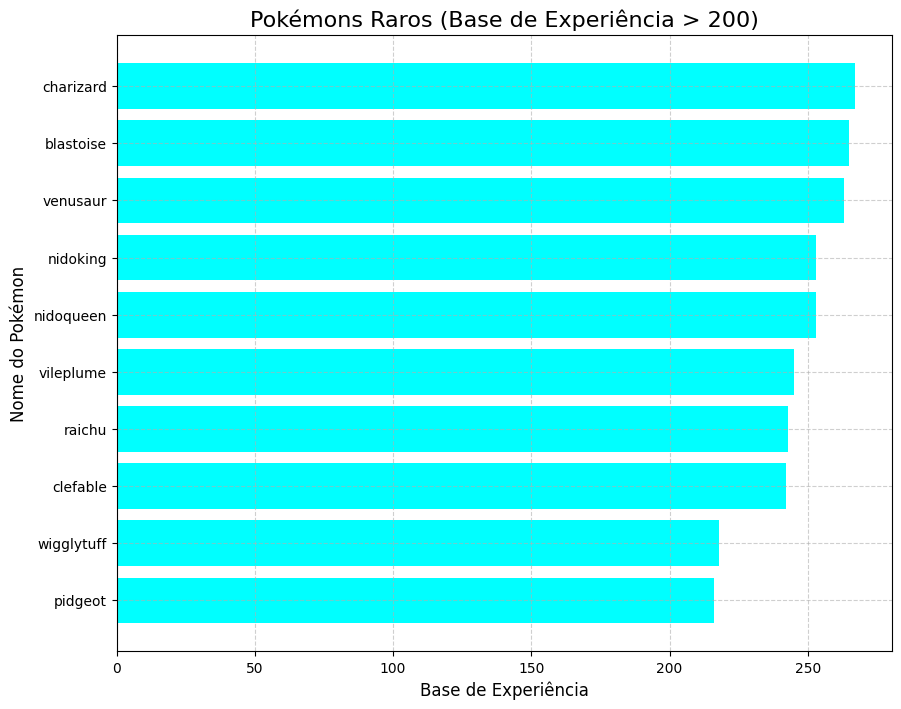

In [11]:

rare_pokemons = rare_pokemons.sort_values('base_experience', ascending=True)


plt.figure(figsize=(10, 8))
plt.barh(rare_pokemons['name'], rare_pokemons['base_experience'], color='cyan')
plt.title('Pokémons Raros (Base de Experiência > 200)', fontsize=16)
plt.xlabel('Base de Experiência', fontsize=12)
plt.ylabel('Nome do Pokémon', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Análise com o Gemini
- Utilizei o modelo de IA generativa Gemini para obter insights adicionais sobre os dados dos Pokémons.


In [12]:
def analyze_with_gemini(df):
    # Formata os dados para o Gemini
    data_str = df.to_string(index=False)
    
    
    mensagem = f"Analise os seguintes dados de Pokémons:\n{data_str}\n\nPor favor, forneça insights sobre esses dados."
    
    # Enviar mensagem ao Gemini e obtem a resposta
    resposta = model.generate_content(mensagem)
    return resposta


analise_gemini = analyze_with_gemini(df)
print("Análise fornecida pelo Gemini:")
print(analise_gemini.text)


Análise fornecida pelo Gemini:
## Insights sobre os dados de Pokémons:

**Observações Gerais:**

* A tabela apresenta dados sobre 30 Pokémons diferentes, incluindo nome, altura, peso, tipo(s) e experiência base.
* Os dados parecem ser das primeiras gerações do jogo, com Pokémons iniciais e outros comuns.

**Análise por Variável:**

* **Altura (m):** A altura dos Pokémons varia bastante, com o menor sendo Caterpie (0.91m) e o maior sendo Arbok (10.67m). A maioria se concentra entre 1m e 4m.
* **Peso (kg):** O peso também apresenta grande variação, com o mais leve sendo Diglett (3.63kg) e o mais pesado sendo Venusaur (453.50kg).
* **Tipo:** Os tipos mais frequentes são: Normal (9), Fogo (6), Água (5), Grama (8) e Poison (11). Interessante notar a combinação Grama/Poison frequente (4).
* **Experiência Base:**  Varia de 39 (Caterpie e Weedle) a 267 (Charizard). Podemos observar que as evoluções finais (Venusaur, Charizard, Blastoise) possuem maior experiência base.

**Relações entre Variáv